<center>
<h1 style="color:red; font-size:70px;"> Wout Van Aert</h1>

Questo è puro divertimento, let's be honest. Voglio vedere quanti secondi posti mi ha fatto il wouttone in carriera... 



<center>

![Goat](../Immagini/wouttone.png)

In [1]:
# Importo il profilo di Vincenzo Nibali
from procyclingstats import Rider
from procyclingstats import Stage
import matplotlib.pyplot as plt

<h1 style="color:blue; font-size:50px;"> Creazione del dataset</h1>

In [14]:
def dataset_creation(riderN, years):
    # Funzione che consenta di creare il dataset con i risultati 
    # nelle gare di nostro interesse

    dataset = []
    for y in years:
        # Ciclo sulle varie stagioni
        rider = Rider("rider/" + riderN + "/" + y)
        season = rider.season_results("stage_url", "result", "distance")

        for i in season:
            if i['distance'] and i['result'] is not None:
                stage = Stage(i["stage_url"])  # una sola chiamata per riga

                # Seleziono il nome della tappa
                parti = i["stage_url"].split("/")
                if parti[-1] == 'result':
                    name = parti[1] + " " + parti[2]
                else:
                    name = parti[1] + " " + parti[2] + " " + parti[3]

                
                if stage.stage_type() != 'TTT':
                
                    try:
                        avgS = stage.avg_speed_winner()
                    except AttributeError:
                        avgS = None 
                       
                    try:
                        altG = stage.vertical_meters()
                    except AttributeError:
                        altG = None 
                                                 
                    try:
                        profS = stage.profile_score()
                    except AttributeError:
                        profS = None 

                    if avgS is not None and altG is not None and profS is not None:
                    
                        print(name)
    
                        # Appendo al dataset quanto serve
                        dataset.append([
                            name, 
                            i['result'],
                            i['distance'],
                            avgS,
                            altG,
                            profS, 
                            stage.stage_type(),
                        ])
    
    return dataset

In [15]:
riderN = 'wout-van-aert'
years = [str(i) for i in range(2016, 2026)]

wouttone_datas = dataset_creation(riderN, years)

schaal-schels 2017
gp-jef-scherens 2017
renewi-tour 2017 stage-6
renewi-tour 2017 stage-5
renewi-tour 2017 stage-4
renewi-tour 2017 stage-3
renewi-tour 2017 stage-2
renewi-tour 2017 stage-1
dwars-door-het-hageland 2017
rad-am-ring 2017
gp-cerami 2017
nc-belgium 2017
nc-belgium-itt 2017
circuit-des-xi-villes 2017
ronde-van-limburg 2017
heist-op-den-berg 2017
tour-of-belgium 2017 stage-4
tour-of-belgium 2017 stage-3
tour-of-belgium 2017 stage-2
tour-of-belgium 2017 stage-1
tour-of-norway 2017 stage-4
tour-of-norway 2017 stage-3
tour-of-norway 2017 stage-2
tour-of-norway 2017 stage-1
antwerp-port-epic 2018
uec-road-european-championships 2018
tour-of-denmark 2018 stage-4
tour-of-denmark 2018 stage-3
tour-of-denmark 2018 stage-2
tour-of-denmark 2018 stage-1
tour-of-austria 2018 stage-7
tour-of-austria 2018 stage-6
tour-of-austria 2018 stage-5
tour-of-austria 2018 stage-4
tour-of-austria 2018 stage-3
tour-of-austria 2018 stage-2
tour-of-austria 2018 stage-1
nc-belgium 2018
circuit-des-xi-vi

In [16]:
res = []
lenS = []
meanV = []
highG = []

# Filtro i dati che voglio plottare
for i in wouttone_datas:
    res.append(i[1])
    lenS.append(i[2])
    meanV.append(i[3])
    highG.append(i[4])

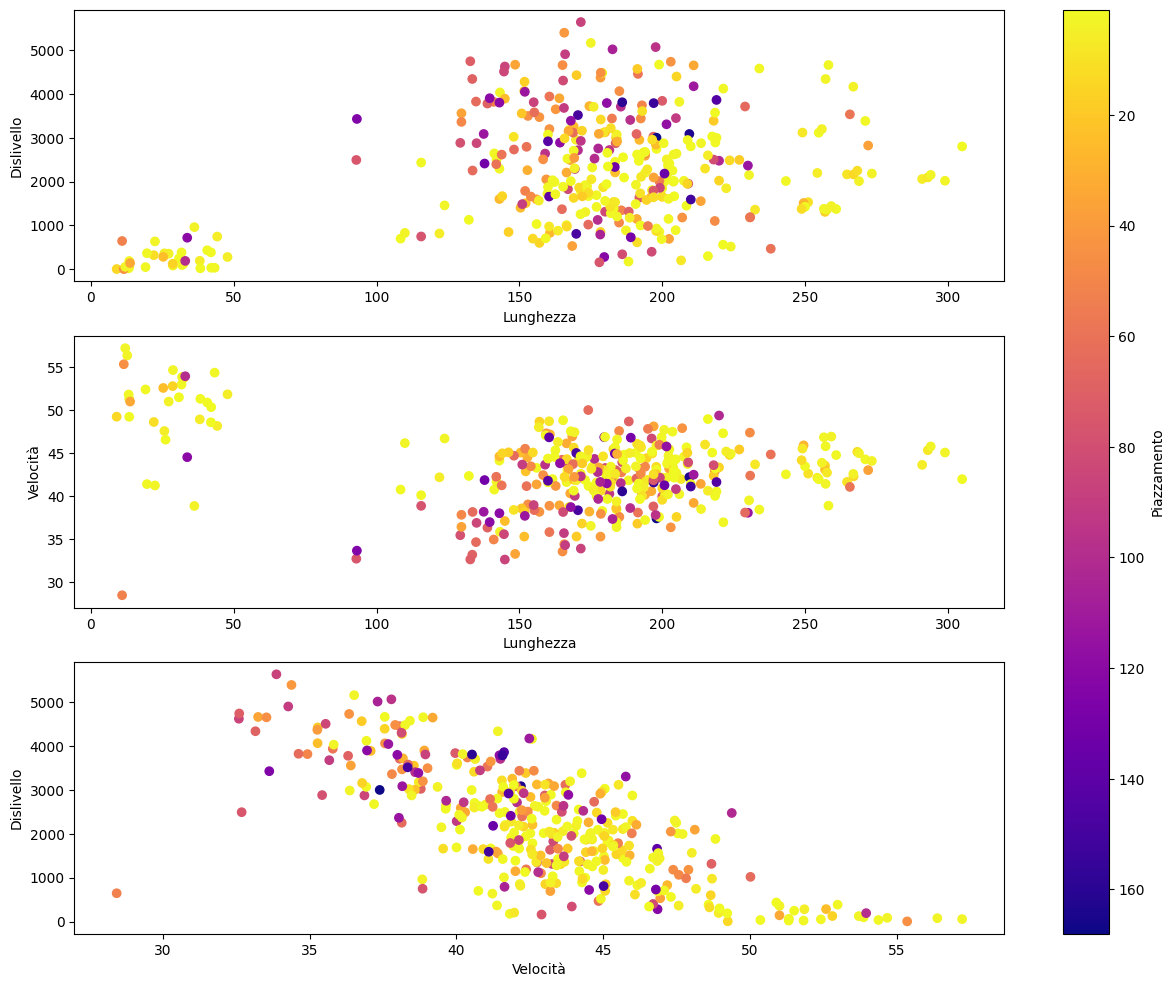

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize=(15, 12))

# Procediamo con lo studio delle variabili d'interesse
sc1 = ax1.scatter(lenS, highG, c=res, cmap='plasma_r', vmin=min(res), vmax=max(res))
ax1.set_xlabel('Lunghezza')
ax1.set_ylabel('Dislivello')

sc2 = ax2.scatter(lenS, meanV, c=res, cmap='plasma_r', vmin=min(res), vmax=max(res))
ax2.set_xlabel('Lunghezza')
ax2.set_ylabel('Velocità')

sc3 = ax3.scatter(meanV, highG, c=res, cmap='plasma_r', vmin=min(res), vmax=max(res))
ax3.set_xlabel('Velocità')
ax3.set_ylabel('Dislivello')

# Aggiungi barra colori condivisa
cbar = fig.colorbar(sc1, ax=(ax1, ax2, ax3), label='Piazzamento')
cbar.ax.invert_yaxis() 
plt.show()

<h1 style="color:blue; font-size:50px;"> Secondi posti</h1>